<a href="https://colab.research.google.com/github/PadamSharma/Stock_Price_Prediction/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
!unzip /content/drive/MyDrive/StockPricePrediction/stock_dataset.zip

Archive:  /content/drive/MyDrive/StockPricePrediction/stock_dataset.zip
replace GOOG.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
google_df = pd.read_csv('/content/GOOG.csv')
apple_df = pd.read_csv('/content/AAPL.csv')
amazon_df = pd.read_csv('/content/AMZN.csv')
microsoft_df = pd.read_csv('/content/MSFT.csv')
tesla_df = pd.read_csv('/content/TSLA.csv')

In [101]:
start_date = '2015-1-1'
def trim_df(company):
  company["Date"] = pd.to_datetime(company["Date"])
  company = company[company['Date'] >= start_date]
  return company

In [102]:
apple_df = trim_df(apple_df)
tesla_df = trim_df(tesla_df)
google_df = trim_df(google_df)
microsoft_df = trim_df(microsoft_df)
amazon_df = trim_df(amazon_df)

year = apple_df['Date']

In [103]:
companies = [apple_df, tesla_df, google_df, microsoft_df, amazon_df]
companies_title = ["Apple", "Tesla", "Google", "Microsoft", "Amazon"]

In [104]:
companywise_adj_close = []
for company in companies:
  adj_close = company[['Adj Close']]
  adj_close = adj_close.set_index(year)
  companywise_adj_close.append(adj_close)

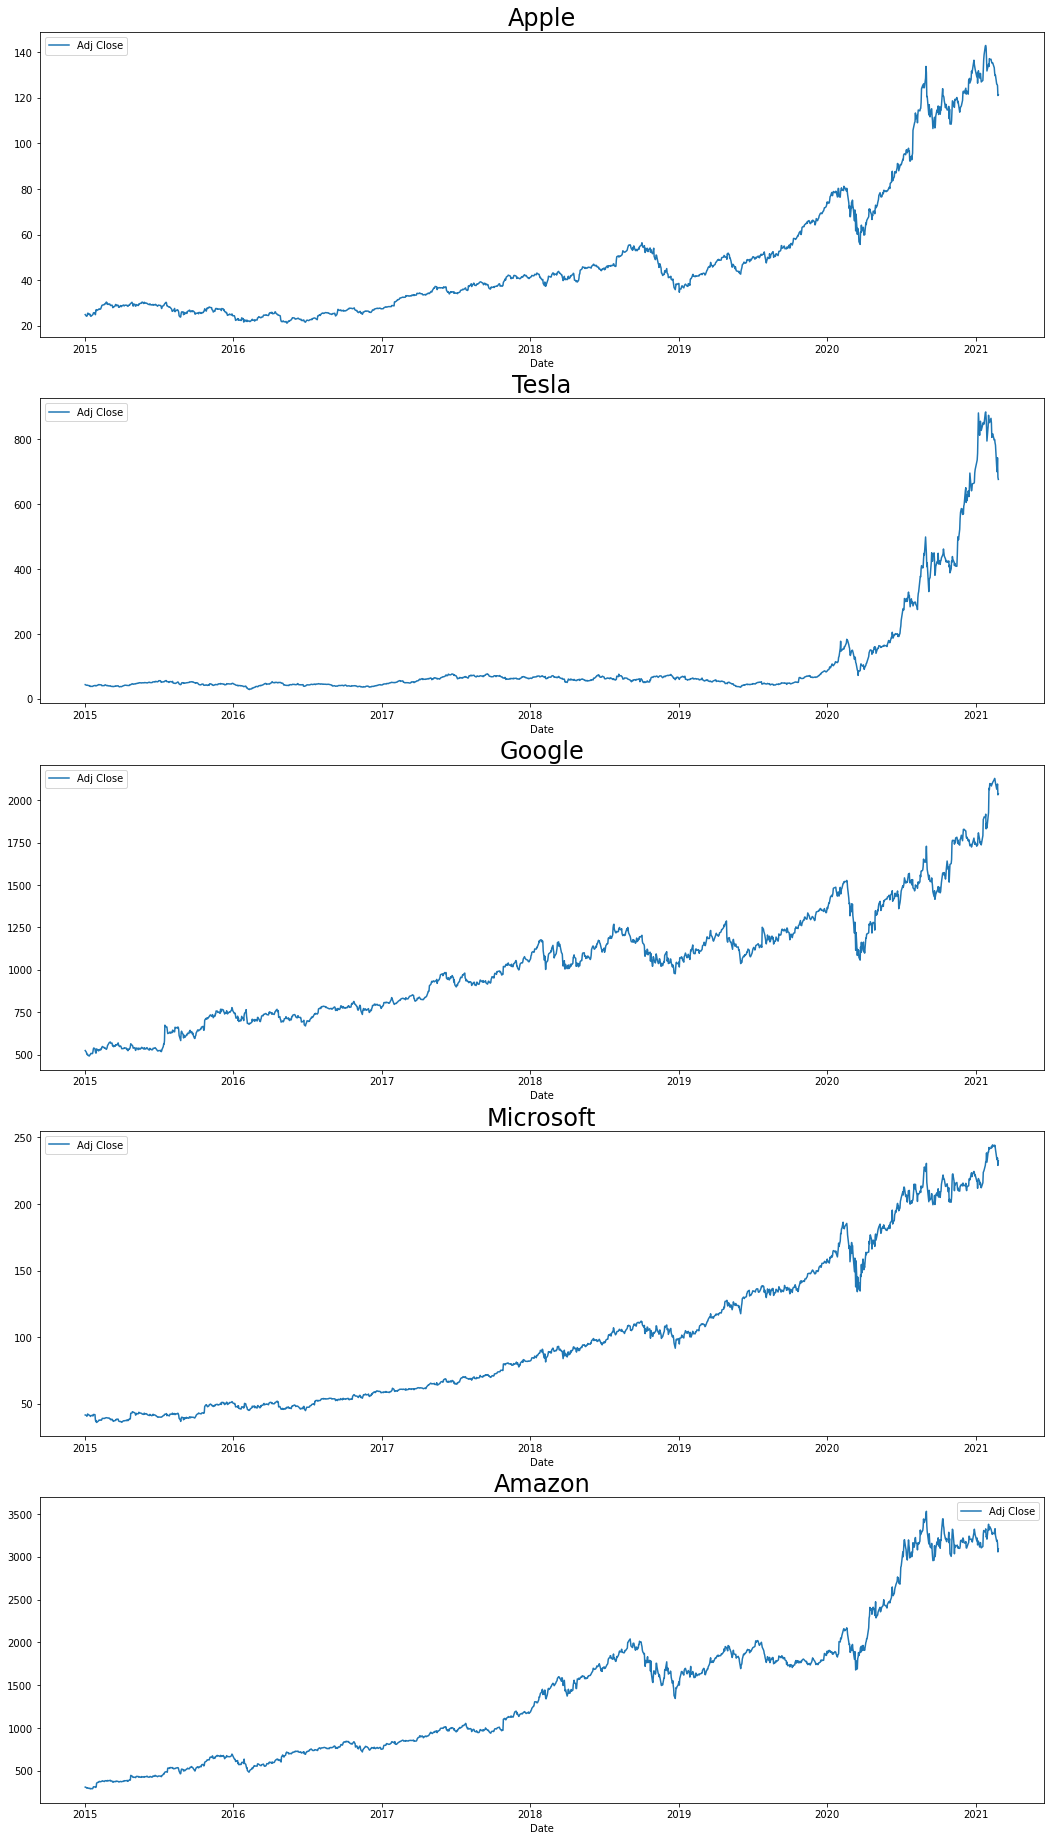

In [105]:
fig, axes = plt.subplots(5, 1, figsize = (18,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=3.2, wspace=None, hspace=None)
for i in range(5):
  sns.lineplot(data = companywise_adj_close[i], ax = axes[i])
  axes[i].set_title(companies_title[i], size = 24)

In [106]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
  for company in companies:
    column_name = f'Moving Average for {Moving_Average} days'
    company[column_name] = company["Adj Close"].rolling(Moving_Average).mean()

In [107]:
companywise_moving_avg = []
for company in companies:
  mov_avg = company[['Moving Average for 10 days', 'Moving Average for 20 days', 'Moving Average for 50 days']]
  mov_avg = mov_avg.set_index(year)
  companywise_moving_avg.append(mov_avg)

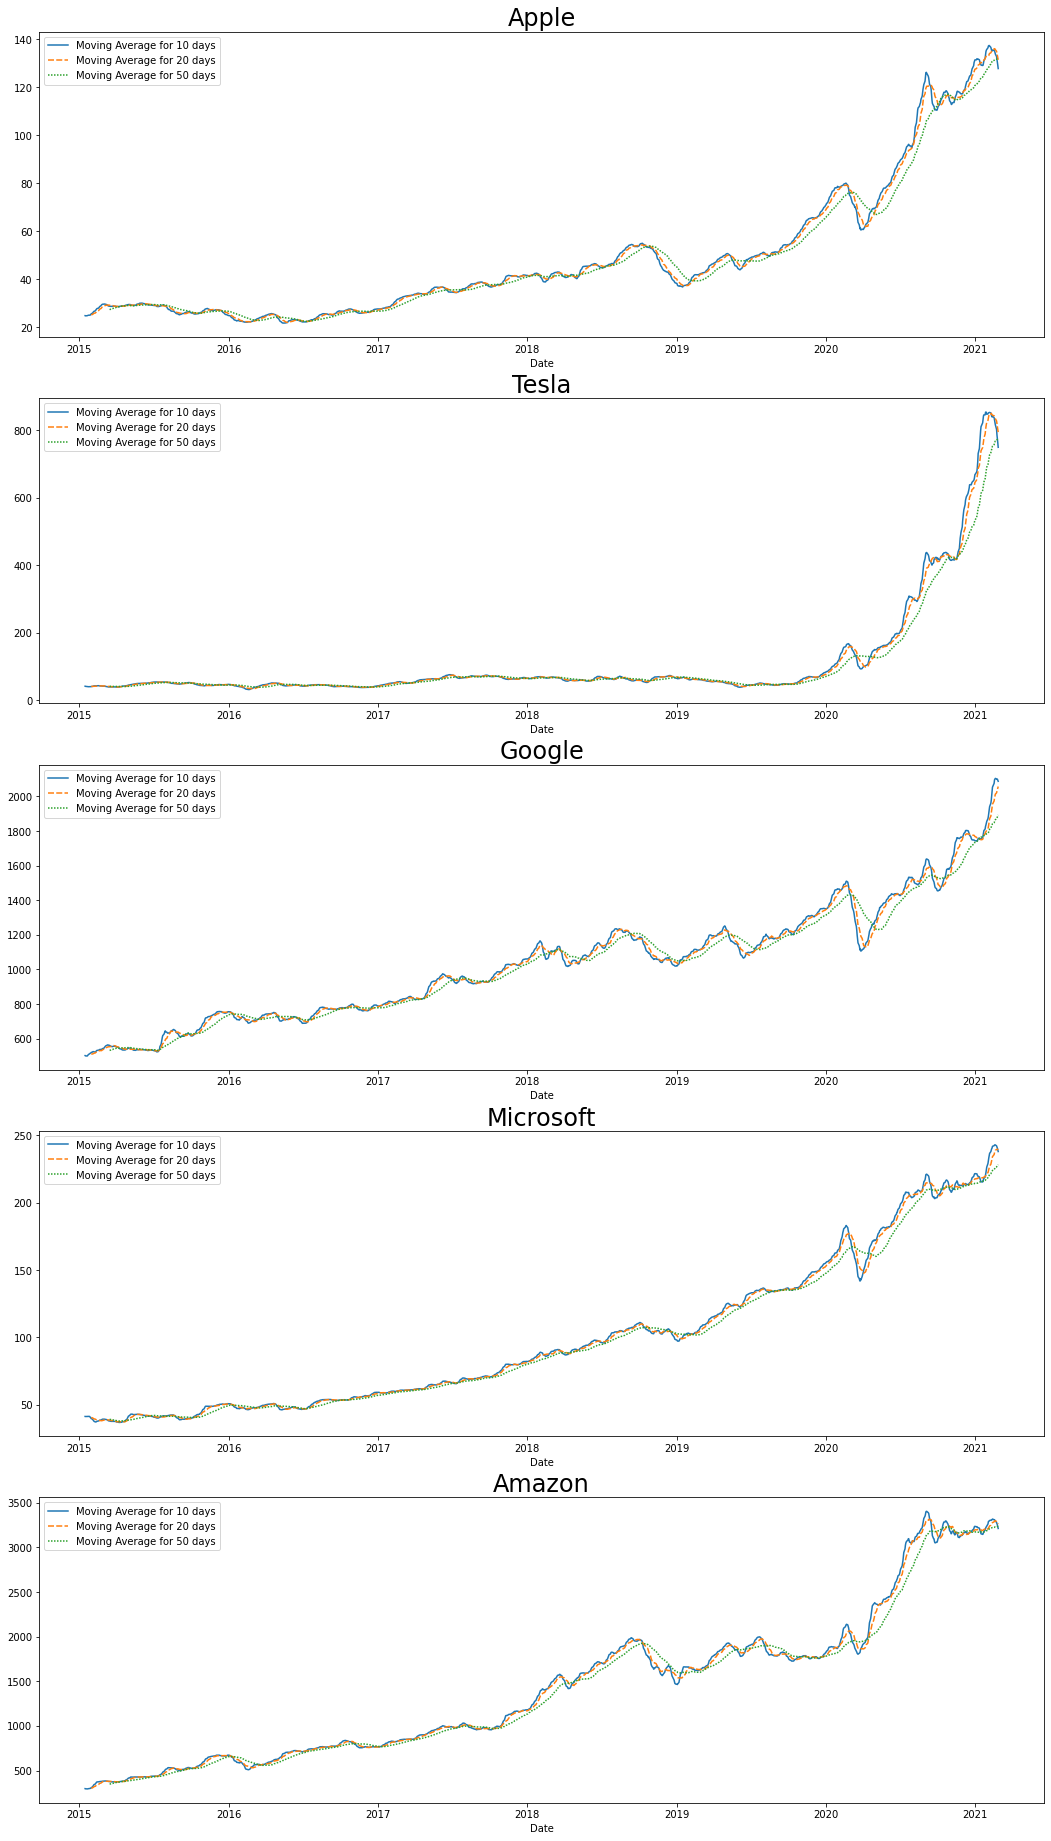

In [108]:
fig, axes = plt.subplots(5, 1, figsize = (18,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=3.2, wspace=None, hspace=None)
for i in range(5):
  sns.lineplot(data = companywise_moving_avg[i], ax = axes[i])
  axes[i].set_title(companies_title[i], size = 24)

In [109]:
for company in companies:
  company['Daily Return'] = company['Adj Close'].pct_change()

In [110]:
companywise_daily_return = []
for company in companies:
  daily_ret = company[['Daily Return']]
  daily_ret = daily_ret.set_index(year)
  companywise_daily_return.append(daily_ret)

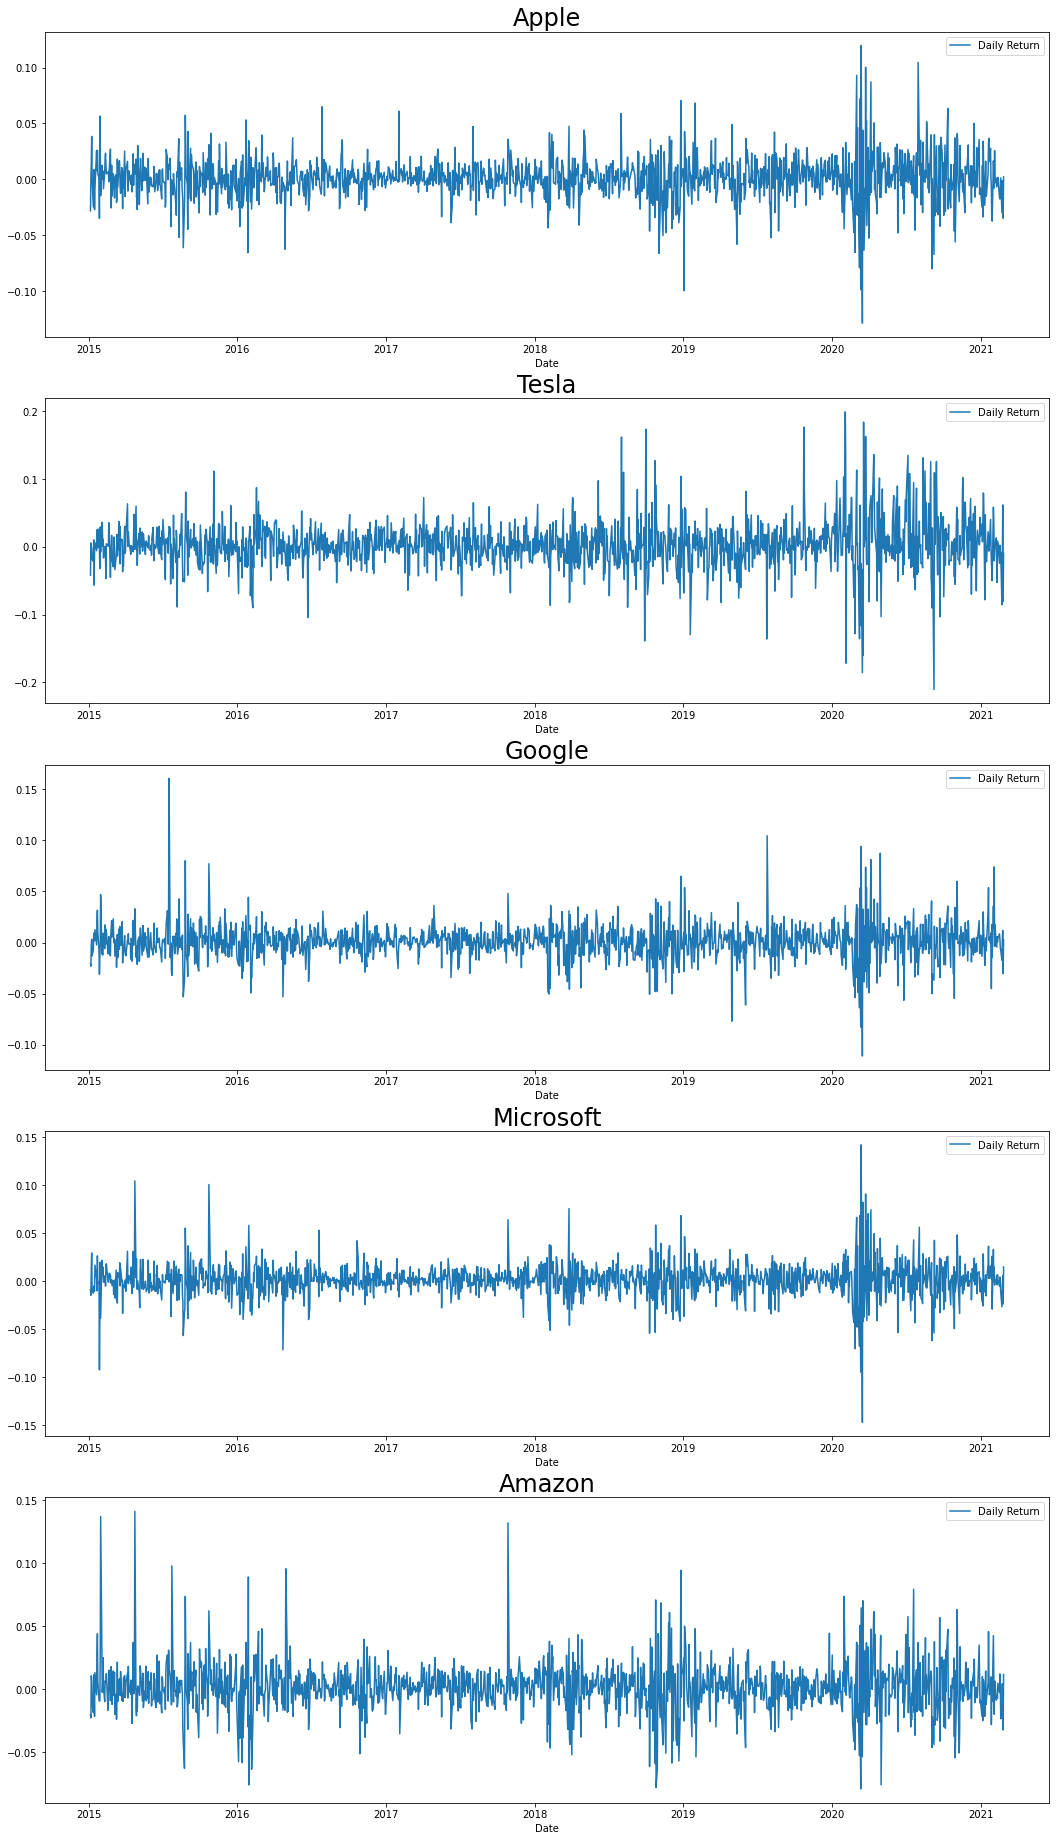

In [111]:
fig, axes = plt.subplots(5, 1, figsize = (18,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=3.2, wspace=None, hspace=None)
for i in range(5):
  sns.lineplot(data = companywise_daily_return[i], ax = axes[i])
  axes[i].set_title(companies_title[i], size = 24)

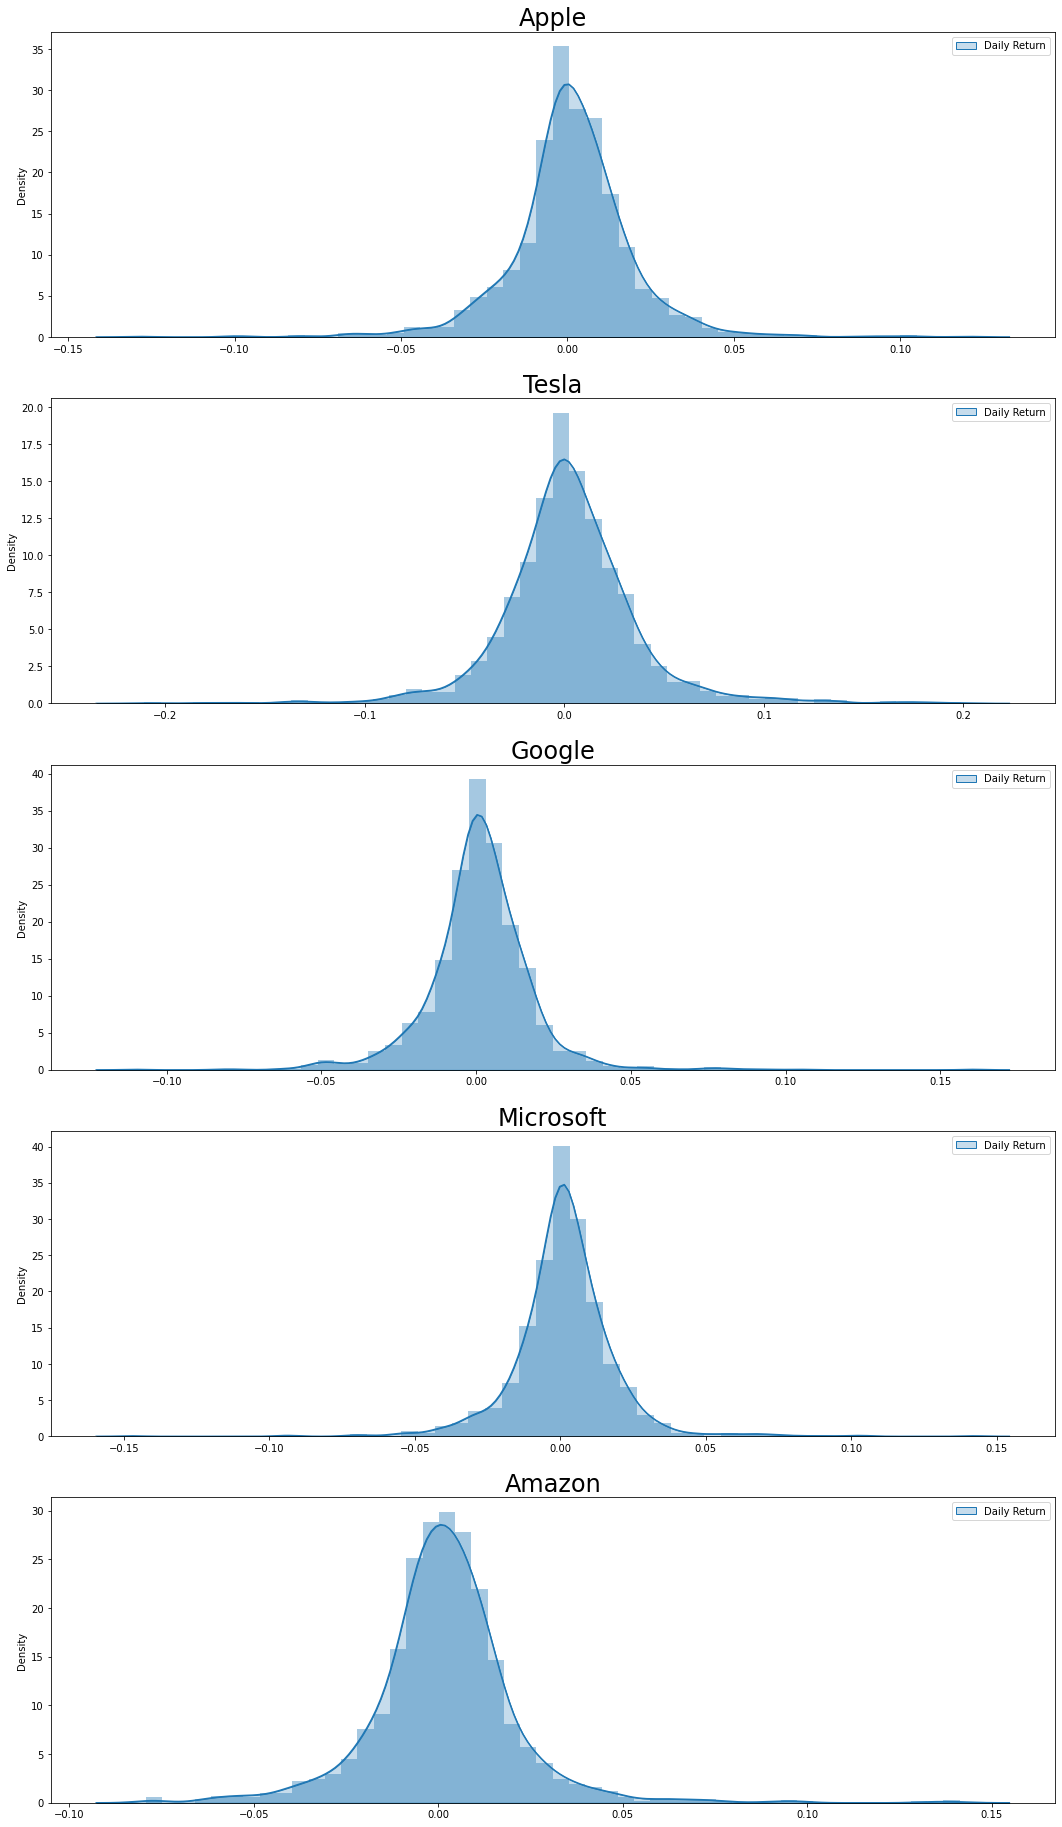

In [112]:
fig, axes = plt.subplots(5, 1, figsize = (18,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=3.2, wspace=None, hspace=None)
for i in range(5):
  sns.kdeplot(data = companywise_daily_return[i], color = 'b', shade = True, ax = axes[i])
  sns.distplot(x = companywise_daily_return[i], ax = axes[i])
  axes[i].set_title(companies_title[i], size = 24)

In [122]:
adj_close_df = pd.concat(companywise_adj_close, axis=1, ignore_index=True)

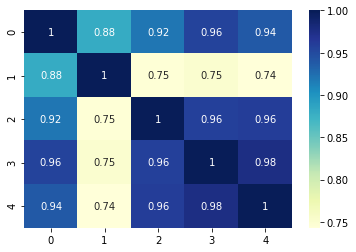

In [123]:
sns.heatmap(adj_close_df.corr(), annot=True, cmap="YlGnBu")

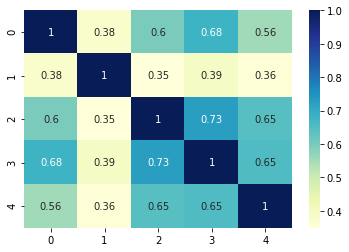

In [125]:
sns.heatmap(adj_close_df.pct_change().corr(), annot=True, cmap="YlGnBu")